In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# predict whether Mc Donald's Stock will go up or down, based on values of other popular indices (weekly data over 5 years)

data = pd.read_csv('UPDOWND.csv', delimiter=';')  # this dataset uses ; instead of ,
print(data.columns)

# this dataset uses , instead of . for decimal values
data = data.replace(',', '.', regex=True).apply(pd.to_numeric, errors='ignore')

data_info = data.info()
data_head = data.head()
data

Index(['MCD', 'S&P', 'DJ', 'Wendy', 'YUM', 'Starbuck', 'Coca', 'Wheat', 'Oil',
       'Commodity', 'sugar', 'Volatilty', 'War'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MCD        1257 non-null   int64  
 1   S&P        1257 non-null   float64
 2   DJ         1257 non-null   float64
 3   Wendy      1257 non-null   float64
 4   YUM        1257 non-null   float64
 5   Starbuck   1257 non-null   float64
 6   Coca       1257 non-null   float64
 7   Wheat      1257 non-null   float64
 8   Oil        1257 non-null   float64
 9   Commodity  1257 non-null   float64
 10  sugar      1257 non-null   float64
 11  Volatilty  1257 non-null   float64
 12  War        1257 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 127.8 KB


,MCD,S&P,DJ,Wendy,YUM,Starbuck,Coca,Wheat,Oil,Commodity,sugar,Volatilty,War
0,1,-0.0028,-0.0008,-0.0033,0.0013,-0.0034,0.0023,-0.0207,-0.0040,-0.0044,0.0200,-0.0990,1.0
1,0,-0.0031,-0.0041,-0.0167,-0.0118,-0.0004,-0.0015,0.0005,0.0164,0.0143,0.0046,0.1485,1.0
2,0,-0.0014,-0.0077,-0.0257,-0.0025,-0.0104,0.0003,0.0146,-0.0054,-0.0018,-0.0095,-0.5238,1.0
3,0,0.0032,0.0068,0.0269,0.0004,-0.0102,-0.0046,0.0032,-0.0075,0.0020,0.0133,1.1193,1.0
4,0,0.0089,0.0103,0.0092,-0.0057,0.0110,0.0086,-0.0136,-0.0214,0.0012,0.0060,-0.0374,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1,0.0021,0.0064,0.0122,-0.0009,0.0003,0.0065,-0.0064,0.0158,0.0041,0.0039,-0.0175,0.0
1253,1,0.0021,0.0015,0.0017,0.0036,0.0008,-0.0084,-0.0005,-0.0058,0.0036,0.0233,0.0128,0.0
1254,0,0.0000,-0.0030,0.0073,-0.0040,0.0042,-0.0032,0.0151,-0.0019,0.0021,-0.0190,0.0137,0.0
1255,0,0.0116,0.0127,-0.0039,0.0077,-0.0051,-0.0030,0.0027,0.0161,0.0072,-0.0008,-0.0300,0.0


In [29]:
X = data.drop('MCD', axis=1)  # features. axis=1 --> columns
y = data['MCD']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)  # transform() uses the mean and standard deviation calculated during the fit_transform()

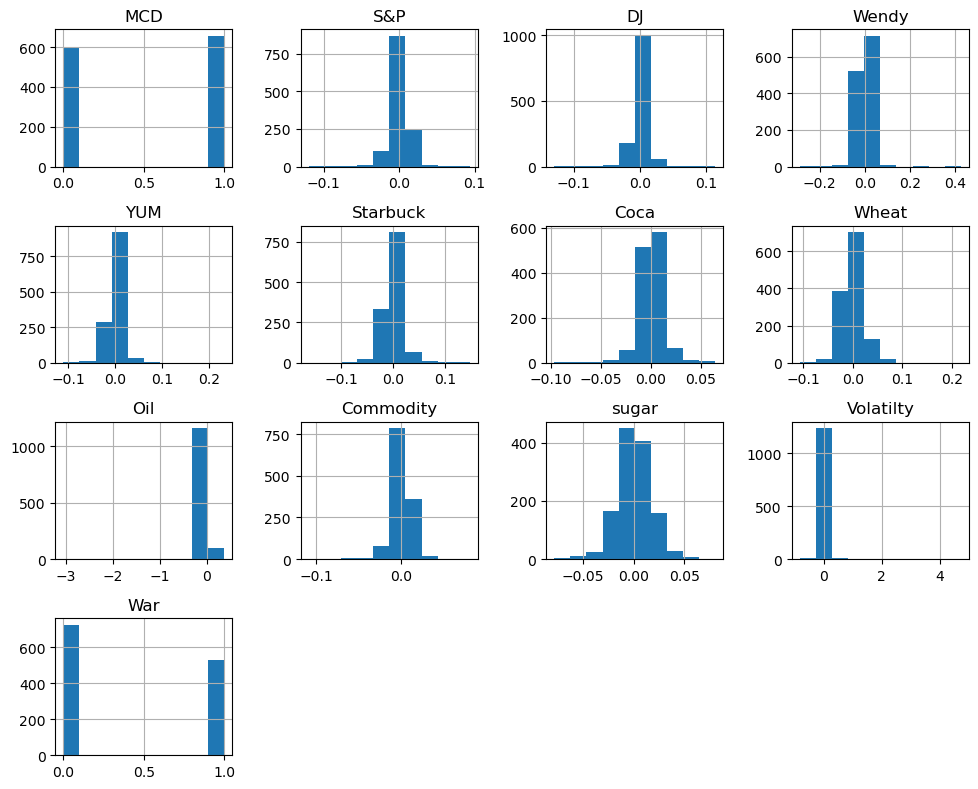

In [30]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [41]:
model = LogisticRegression()
model.fit(X_train_norm, y_train)

LogisticRegression()

In [64]:
# feature selection method 
# fits a model and removes the weakest features until the specified number of features is reached
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train_norm, y_train)

print(selector.support_)  # which features are selected
print(selector.ranking_)  # 1 --> feature selected

[False False  True  True  True False False  True False  True False False]
[3 8 1 1 1 2 6 1 7 1 4 5]


In [65]:
# to fit model with selected features
model.fit(X_train_norm[:, selector.support_], y_train)

LogisticRegression()

In [66]:
w = model.coef_
b = model.intercept_
print(f'weights: {w} \n bias: {b}')

weights: [[-0.08129173  0.12827158 -0.1278073   0.08527164  0.08330238]] 
 bias: [0.07334576]


In [67]:
y_pred = model.predict(X_test_norm[:, selector.support_])  # selected features only
print(f"\nPrediction on test set:\n{y_pred[:10]}" )
print(f"Target values \n{list(y_test[:10])}")


Prediction on test set:
[0 1 1 1 1 0 0 0 0 0]
Target values 
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [68]:
y_test.shape, y_pred.shape

((252,), (252,))

In [90]:
# accuracy_score(y_test, y_pred)
# not very accurate
print(f'Accuracy on test set:', model.score(X_test_norm[:, selector.support_], y_test))

Accuracy on test set: 0.5515873015873016
